# End-to-End

## 1. Problem (mini project)

Mini Project: FIFA - MoneyBall

Perform an end-to-end analysis putting into practice what you have learned so far. You will apply statistical or machine learning techniques and present your results to the class.



In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

## 2. Getting Data

In [2]:
data = pd.read_csv('fifa21_male2.csv')
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [3]:
data.shape

(17125, 107)

In [4]:
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

#### A lot of meanings of the columns can be found in https://sofifa.com/

#### Some abbreviations:
OVA = overall scores
<br>BOV = best overall
<br>POT = potential scores
<br>GK = goalkeeping
<br>W/F = weak foot
<br>SM = skilled moves
<br>IR = international reputation
<br>CF = center forward

## 3. Cleaning/Wrangling/EDA

In [5]:
# standarize name of columns and set ID column as index
data.columns = [col_name.lower().replace(' ', '_') for col_name in data.columns]
data = data.set_index(["id"])
data.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position                                       player_photo  \
id                                                                    
2             LM  https://cdn.sofifa.com/players/000/002/16_120.png   
16    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
27  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
36           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
41        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                           club_logo  \
id                                                     
2       https://cdn.sofifa.com/teams/55/light_60.png   
16    https://cdn.sofifa.com/teams/2013/light_60.png   
27    https://cdn.sofifa.com/teams/1800/light_60.png   
36     https://cdn.sofifa.com/teams/106/light_60.png   
41  https://cdn.sofifa.com/teams/101146/light_60.png   

                                 flag_photo  pot            team_&_contract  \
id                                                                            
2       https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
16      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
27  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
36      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
41      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

   height  weight   foot  growth        joined loan_date_end  value  wage  \
id                                                                          
2    6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
16  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
27   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
36  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
41   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

   release_clause     contract  attacking  crossing  finishing  \
id                                                               
2              €0  2008 ~ 2016        313        75         50   
16          €1.1M  2014 ~ 2019        337        68         64   
27             €0  2016 ~ 2020        337        80         64   
36             €0         2009        264        54         70   
41          €7.2M  2018 ~ 2021        367        75         69   

    heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                      
2                 59             71     58.0    338         73   65.0   
16                61             76     68.0    369         69   79.0   
27                41             77     75.0    387         79   84.0   
36                60             80      NaN    255         68    NaN   
41                54             90     79.0    408         85   80.0   

    fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                    
2            60            69            71       347            68   
16           79            71            71       305            56   
27           77            69            78       295            48   
36           46            64            77       176            59   
41           70            83            90       346            61   

    sprint_sp

#### Some more details about the dataset: 

"attacking" = sum ("crossing","finishing","heading_accuracy","short_passing","volleys")
<br>"skill" = sum ("dribbling","curve","fk_accuracy","long_passing","ball_control")
<br>"movement" = sum ("acceleration","sprint_speed","agility","reactions","balance")
<br>"power" = sum ("shot_power","jumping","stamina","strength","long_shots")
<br>"mentality" = sum ("aggression","interceptions","positioning","vision","penalties","composure")
<br>"defending" = sum ("marking","standing_tackle","sliding_tackle")
<br>"goalkeeping" = sum ("gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes")
<br>"total_stats" = sum ("attacking","skill","movement","power","mentality","defending","goalkeeping")
<br>"base_stats" = sum ("pac","sho","pas","dri","def","phy")

In [6]:
# columns to drop
drop_columns = ["position","player_photo","club_logo","flag_photo","team_&_contract","joined","contract",
                "crossing","finishing","heading_accuracy","short_passing","volleys",
                "dribbling","curve","fk_accuracy","long_passing","ball_control",
                "acceleration","sprint_speed","agility","reactions","balance",
                "shot_power","jumping","stamina","strength","long_shots",
                "aggression","interceptions","positioning","vision","penalties","composure",
                "marking","standing_tackle","sliding_tackle",
                "gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes",
                "base_stats","w/f","sm","pac","sho","pas","dri","def","phy","hits",
                "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm",
                "cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk","gender"]

In [7]:
data = data.drop(drop_columns, axis=1)

In [8]:
# rename the remaining columns with their corresponding meanings
data = data.rename(columns={"ova":"overall_scores",
                        "bov":"best_overall",
                        "pot":"potential_scores",
                        "w/f":"weak_foot",
                        "ir":"international_reputation",
                        "gk":"goalkeeper",
                        "cf":"center_forward",
                        "lde":"loan_date_end",
                        "bp":"better_position", 
                        "sm":"skilled_moves",
                        "a/w":"attacking_work_rate",
                        "d/w":"defensive_work_rate",})
data.head()

name  age  overall_scores            nationality           club  \
id                                                                           
2   G. Pasquale   33              69                  Italy        Udinese   
16  Luis García   37              71                  Spain      KAS Eupen   
27      J. Cole   33              71                England  Coventry City   
36     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36              81                  Spain    Vissel Kobe   

    best_overall better_position  potential_scores height  weight   foot  \
id                                                                         
2             71             LWB                69   6'0"  181lbs   Left   
16            70              CM                71  5'10"  143lbs  Right   
27            71             CAM                71   5'9"  161lbs  Right   
36            70              ST                82  5'11"  165lbs  Right   
41            82             CAM                81   5'7"  150lbs  Right   

    growth loan_date_end  value  wage release_clause  attacking  skill  \
id                                                                       
2        0           NaN  €625K   €7K             €0        313    338   
16       0           NaN  €600K   €7K          €1.1M        337    369   
27       0           NaN  €1.1M  €15K             €0        337    387   
36      14           NaN     €0    €0             €0        264    255   
41       0           NaN  €5.5M  €12K          €7.2M        367    408   

    movement  power  mentality  defending  goalkeeping  total_stats  \
id                                                                    
2        347    347        320        208           56         1929   
16       305    324        362        153           56         1906   
27       295    284        317         99           51         1770   
36       176    239        271         75           68         1348   
41       346    297        370        181           45         2014   

   attacking_work_rate defensive_work_rate international_reputation  
id                                                                   
2               Medium                High                      2 ★  
16              Medium              Medium                      1 ★  
27              Medium                 Low                      2 ★  
36                 NaN                 NaN                      1 ★  
41                High              Medium                      4 ★

In [9]:
# NAN values
data.isna().sum()

name                            0
age                             0
overall_scores                  0
nationality                     0
club                           23
best_overall                    0
better_position                 0
potential_scores                0
height                          0
weight                          0
foot                            0
growth                          0
loan_date_end               16215
value                           0
wage                            0
release_clause                  0
attacking                       0
skill                           0
movement                        0
power                           0
mentality                       0
defending                       0
goalkeeping                     0
total_stats                     0
attacking_work_rate            89
defensive_work_rate            89
international_reputation        0
dtype: int64

In [10]:
# column `loan_date_end` has a large number of NaN values (16,215) --> drop
data = data.drop(["loan_date_end"], axis=1)

In [11]:
data.isna().sum()

name                         0
age                          0
overall_scores               0
nationality                  0
club                        23
best_overall                 0
better_position              0
potential_scores             0
height                       0
weight                       0
foot                         0
growth                       0
value                        0
wage                         0
release_clause               0
attacking                    0
skill                        0
movement                     0
power                        0
mentality                    0
defending                    0
goalkeeping                  0
total_stats                  0
attacking_work_rate         89
defensive_work_rate         89
international_reputation     0
dtype: int64

In [12]:
# fill NAN with "unknown" in the column club
data["club"] = data["club"].fillna("unknown")
data.shape

(17125, 26)

In [13]:
# drop the remaining NAN values
data = data.dropna(axis=0)
data.shape

(17036, 26)

In [14]:
data.dtypes

name                        object
age                          int64
overall_scores               int64
nationality                 object
club                        object
best_overall                 int64
better_position             object
potential_scores             int64
height                      object
weight                      object
foot                        object
growth                       int64
value                       object
wage                        object
release_clause              object
attacking                    int64
skill                        int64
movement                     int64
power                        int64
mentality                    int64
defending                    int64
goalkeeping                  int64
total_stats                  int64
attacking_work_rate         object
defensive_work_rate         object
international_reputation    object
dtype: object

#### Columns that are objects and should be numerical:
height, weight, value, wage, release_clause, weak_foot, skilled_moves, international_reputation, hits

In [15]:
# height: convert to cm
data["height"].value_counts()

6'0"     2572
5'10"    2406
5'9"     2015
5'11"    1931
6'2"     1860
6'1"     1799
5'8"      955
6'3"      951
5'7"      892
6'4"      714
5'6"      306
6'5"      254
5'5"      184
6'6"      110
5'4"       28
6'7"       27
5'3"       12
6'8"       11
5'2"        5
6'9"        2
5'1"        2
Name: height, dtype: int64

In [16]:
data["height"] = data["height"].str.replace('"','').apply(lambda x: round((int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54), 2))
data["height"].unique()

array([182.88, 177.8 , 175.26, 170.18, 172.72, 180.34, 193.04, 167.64,
       187.96, 190.5 , 198.12, 185.42, 165.1 , 195.58, 200.66, 157.48,
       203.2 , 162.56, 160.02, 205.74, 154.94])

In [17]:
# weight: convert to kg
data["weight"] = data["weight"].str.replace('lbs','').apply(lambda x: round((int(x)*0.45359237), 2))
data["weight"].unique()

array([ 82.1 ,  64.86,  73.03,  68.04,  73.94,  72.12,  71.21,  76.2 ,
        74.84,  94.8 ,  91.17,  69.85,  78.93,  92.08,  79.83,  83.01,
        68.95,  89.81,  92.99,  83.91,  77.11,  78.02,  63.96,  88.  ,
        84.82,  88.9 ,  86.18,  81.19,  67.13,  66.22,  99.79,  87.09,
       110.22,  60.78,  93.89,  96.16,  63.05, 101.15, 102.97,  98.88,
        59.87,  58.06,  62.14,  97.07,  58.97,  57.15,  97.98, 107.05,
        55.79, 102.06, 103.87,  54.88,  53.07,  49.9 ,  53.98,  52.16])

In [18]:
# value
def clean_value(x):
    x = x.replace("€","")
    if "M" in x:
        x = float(x.replace("M","")) * 1000000
    elif "K" in x:
        x = float(x.replace("K","")) * 1000
    else:
        x = float(x)
    x = int(x)
    return x

data["value"] = list(map(clean_value, data["value"])) 
data["value"].unique()

array([   625000,    600000,   1100000,   5500000,    725000,   2800000,
            1000,    400000,    120000,         0,    500000,    190000,
         2200000,    350000,   1300000,   1500000,    275000,    325000,
          900000,     80000,   3000000,     35000,    975000,    425000,
          850000,     45000,   3200000,   1200000,     50000,    825000,
          130000,   1800000,    575000,   2100000,   1600000,    375000,
         2700000,    550000,   1700000,   3400000,    150000,    300000,
         4200000,   5000000,   1900000,   6500000,    875000,  15500000,
          210000,    450000,   1000000,    775000,   1400000,    100000,
          240000,    650000,    950000,   6000000,   3900000,  46000000,
           30000,   2500000,   4099999,     15000,   7500000,   4300000,
           25000,   9500000,   3100000,     90000,   2400000,    675000,
          475000,   2300000,    925000,   4700000,   4500000,    230000,
         2000000,     70000,   7000000,    170000, 

In [19]:
# wage: same as value
data["wage"] = list(map(clean_value, data["wage"]))
data["wage"].unique()

array([  7000,  15000,  12000,   5000,  44000,  60000,  40000,      0,
        10000,  30000,  45000,   6000,  41000,   3000,  20000,   4000,
         2000,  35000,   8000,  25000, 160000,  80000,   9000,  70000,
       100000,  11000, 220000,  90000,    500,  19000,   1000,  50000,
        49000,  22000,  21000,  33000,    750, 110000,  23000,  16000,
          700,  13000,  17000,  31000,    600,    550,  27000,  14000,
       200000,  28000,  37000,  94000,  32000,  29000,  18000,    650,
        34000,  53000,  47000,  43000,  26000,  36000,  79000,  24000,
       300000,  66000,  62000,  54000,  65000, 560000,    900,  42000,
        57000,  93000,  48000,  51000, 350000,  81000, 125000,  58000,
        39000,  85000,  98000,  38000,  46000,  76000,  84000, 130000,
       115000,  83000, 170000,    800, 260000,  59000,  72000,    950,
        55000,  61000,  56000,  96000, 150000,  63000,  87000,    850,
       140000,  64000, 310000,  89000,  82000, 120000, 105000,  68000,
      

In [20]:
# release_clause: same as value
data["release_clause"] = list(map(clean_value, data["release_clause"]))
data["release_clause"].unique()

array([      0, 1100000, 7200000, ...,  121000,  142000,  367000],
      dtype=int64)

In [21]:
# international_reputation
data["international_reputation"] = data["international_reputation"].str.replace(' ★','').str.strip().astype(int)
data["international_reputation"].unique()

array([2, 1, 4, 3, 5])

In [22]:
# Position
data.better_position.value_counts()

CB     3234
ST     2639
CAM    2240
GK     1567
RM     1400
CDM    1243
CM      986
LB      920
RB      893
LM      803
RW      326
LWB     252
RWB     251
LW      208
CF       74
Name: better_position, dtype: int64

In [23]:
defense_positions = ["CB", "RB", "LB", "LWB", "RWB"]
midfield_positions = ["CDM", "CM", "RM", "LM", "CAM"]
attack_positions = ["LW", "RW", "CF", "ST"]

def clean_position(x):
    if x in defense_positions:
        x = "Defense"
    elif x in midfield_positions:
        x = "Midfield"
    elif x in attack_positions:
        x = "Attack"
    elif x == "GK":
        x = "Goalkeeper"
    return x

data["better_position"] = list(map(clean_position, data["better_position"])) 
data["better_position"].value_counts()

Midfield      6672
Defense       5550
Attack        3247
Goalkeeper    1567
Name: better_position, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17036 entries, 2 to 259105
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17036 non-null  object 
 1   age                       17036 non-null  int64  
 2   overall_scores            17036 non-null  int64  
 3   nationality               17036 non-null  object 
 4   club                      17036 non-null  object 
 5   best_overall              17036 non-null  int64  
 6   better_position           17036 non-null  object 
 7   potential_scores          17036 non-null  int64  
 8   height                    17036 non-null  float64
 9   weight                    17036 non-null  float64
 10  foot                      17036 non-null  object 
 11  growth                    17036 non-null  int64  
 12  value                     17036 non-null  int64  
 13  wage                      17036 non-null  int64  
 14  relea

In [25]:
data.describe().apply(lambda x: round(x,2))

age  overall_scores  best_overall  potential_scores    height  \
count  17036.00        17036.00      17036.00          17036.00  17036.00   
mean      25.25           66.95         67.88             72.46    181.22   
std        4.92            6.84          6.61              5.74      6.89   
min       16.00           45.00         44.00             47.00    154.94   
25%       21.00           62.00         64.00             69.00    175.26   
50%       25.00           67.00         68.00             72.00    180.34   
75%       29.00           72.00         72.00             76.00    185.42   
max       53.00           93.00         93.00             95.00    205.74   

         weight    growth         value       wage  release_clause  attacking  \
count  17036.00  17036.00  1.703600e+04   17036.00    1.703600e+04   17036.00   
mean      75.13      5.51  2.580790e+06   10587.95    4.598343e+06     258.62   
std        7.17      5.79  5.383425e+06   21186.80    1.036013e+07      72.25   
min       49.90      0.00  0.000000e+00       0.00    0.000000e+00      42.00   
25%       69.85      0.00  3.750000e+05    1000.00    5.230000e+05     232.00   
50%       74.84      4.00  8.000000e+05    3000.00    1.300000e+06     271.00   
75%       79.83      9.00  2.400000e+06   11000.00    3.900000e+06     306.00   
max      110.22     26.00  1.055000e+08  560000.00    2.031000e+08     437.00   

          skill  movement     power  mentality  defending  goalkeeping  \
count  17036.00  17036.00  17036.00   17036.00   17036.00     17036.00   
mean     266.69    323.12    302.60     261.96     141.66        77.53   
std       76.83     54.56     49.28      62.85      61.55        81.10   
min       43.00    113.00    128.00      50.00      20.00         5.00   
25%      232.00    295.00    272.00     235.00      85.00        48.00   
50%      279.00    332.00    308.00     270.00     158.50        53.00   
75%      319.00    361.00    339.00     304.00     194.00        59.00   
max      470.00    464.00    444.00     421.00     272.00       440.00   

       total_stats  international_reputation  
count     17036.00                  17036.00  
mean       1632.19                      1.15  
std         259.98                      0.45  
min         731.00                      1.00  
25%        1493.00                      1.00  
50%        1660.00                      1.00  
75%        1812.00                      1.00  
max        2316.00                      5.00

In [26]:
# check numericals
numerical = data.select_dtypes(np.number)
numerical.head()

age  overall_scores  best_overall  potential_scores  height  weight  \
id                                                                        
2    33              69            71                69  182.88   82.10   
16   37              71            70                71  177.80   64.86   
27   33              71            71                71  175.26   73.03   
41   36              81            82                81  170.18   68.04   
61   27              66            66                70  172.72   73.94   

    growth    value   wage  release_clause  attacking  skill  movement  power  \
id                                                                              
2        0   625000   7000               0        313    338       347    347   
16       0   600000   7000         1100000        337    369       305    324   
27       0  1100000  15000               0        337    387       295    284   
41       0  5500000  12000         7200000        367    408       346    297   
61       4   725000   5000               0        271    276       406    315   

    mentality  defending  goalkeeping  total_stats  international_reputation  
id                                                                            
2         320        208           56         1929                         2  
16        362        153           56         1906                         1  
27        317         99           51         1770                         2  
41        370        181           45         2014                         4  
61        256         79           46         1649                         2

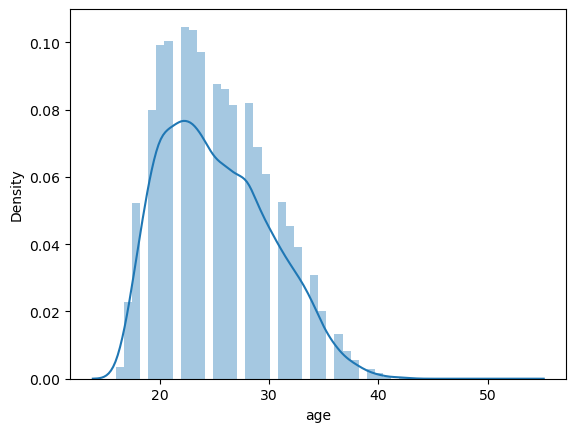

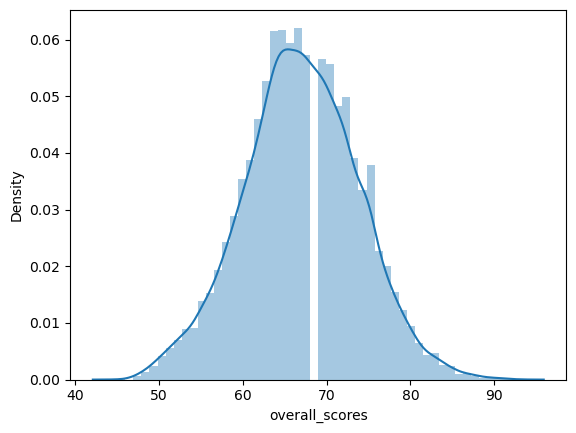

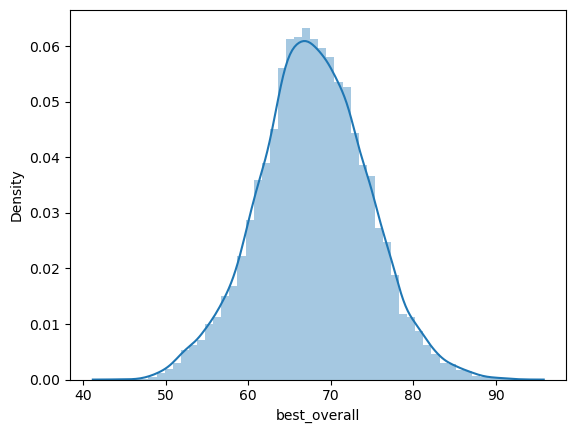

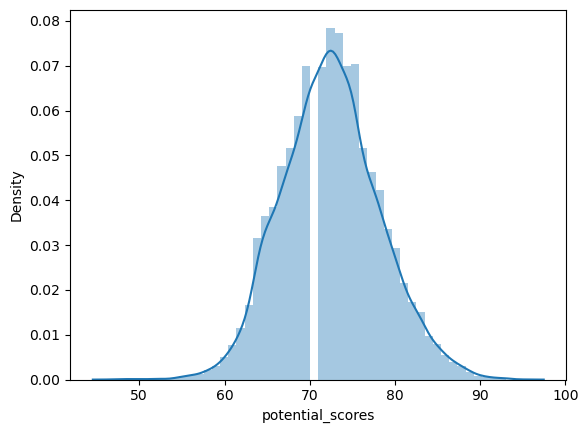

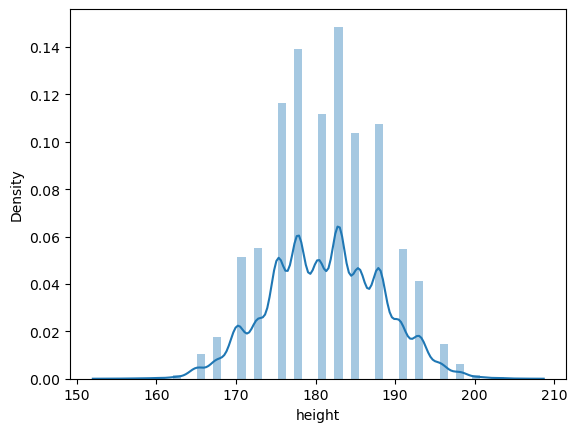

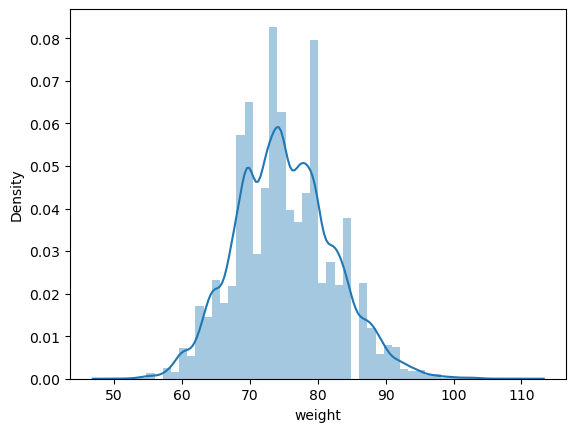

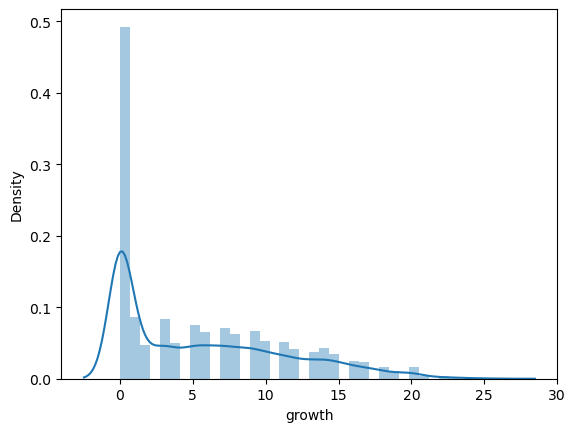

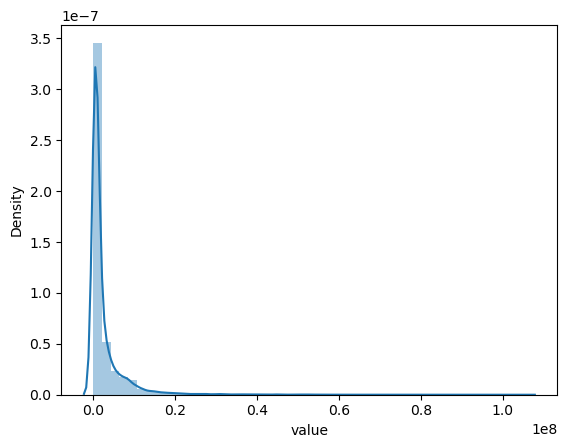

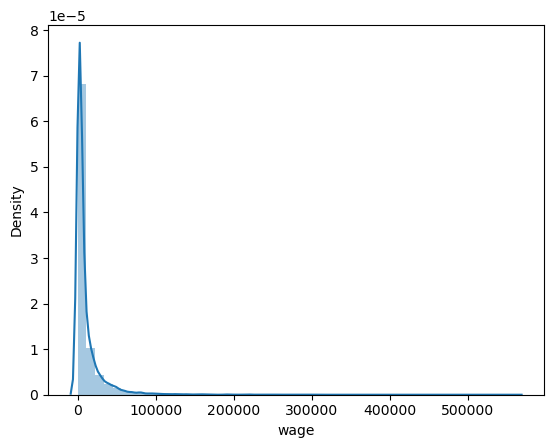

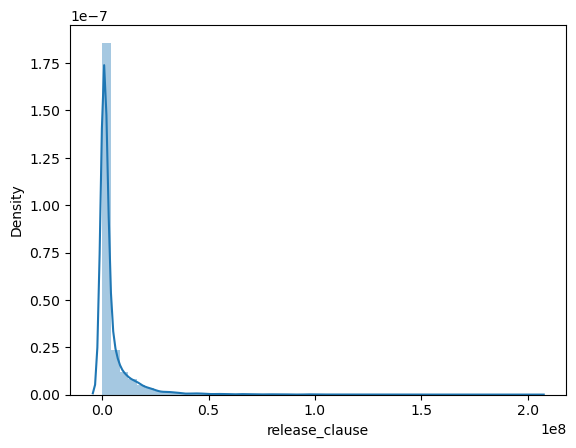

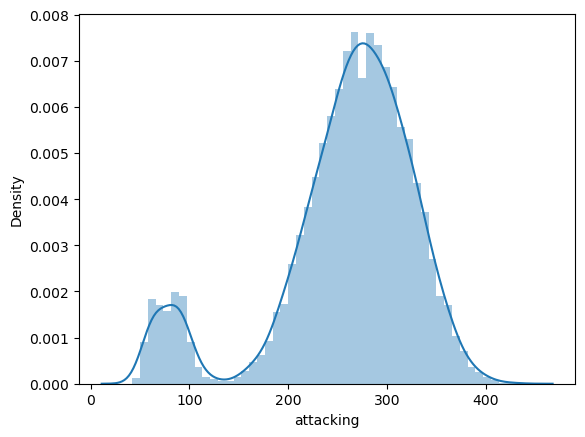

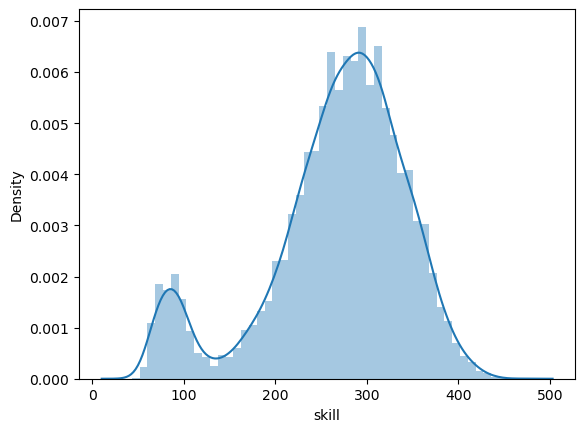

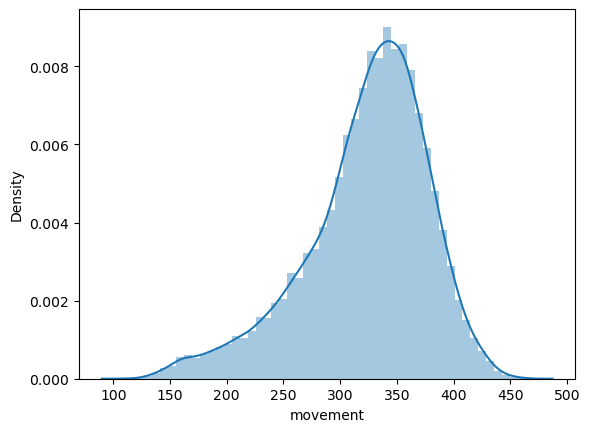

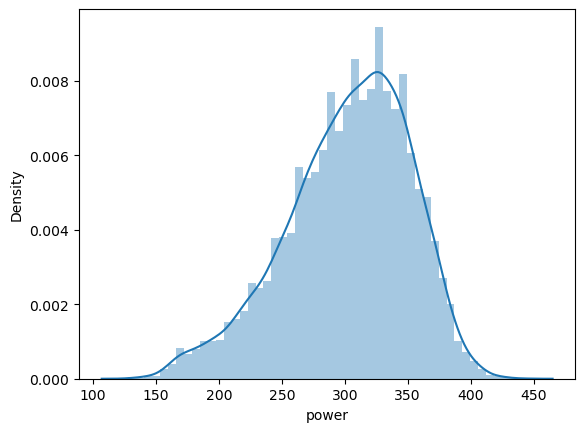

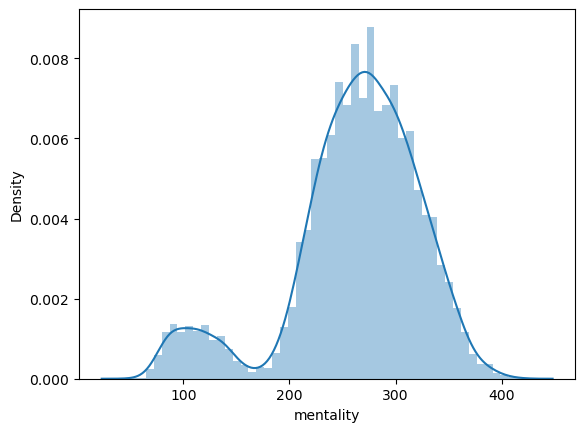

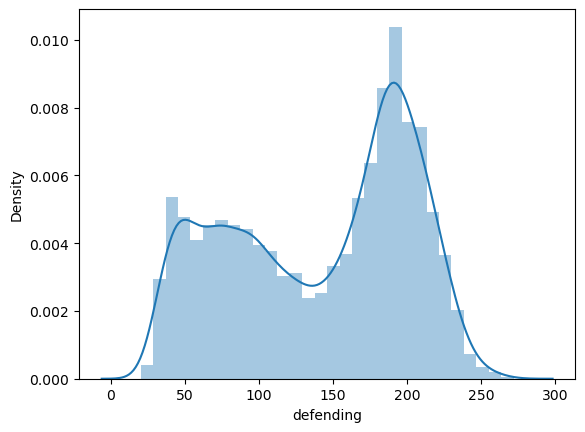

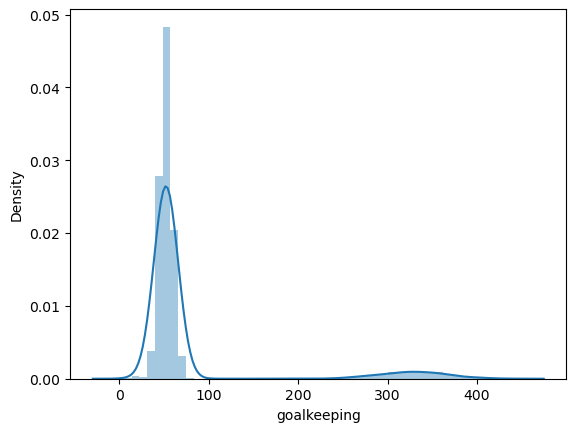

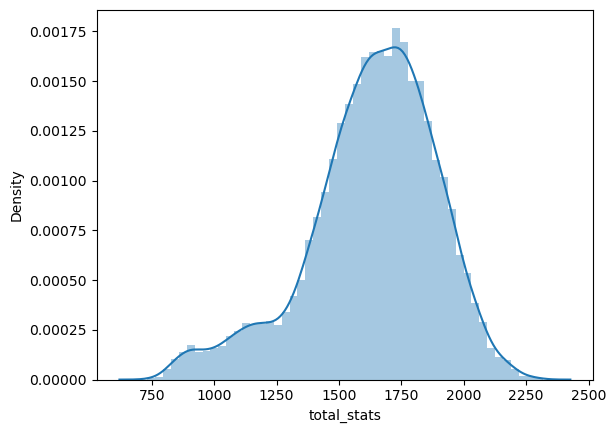

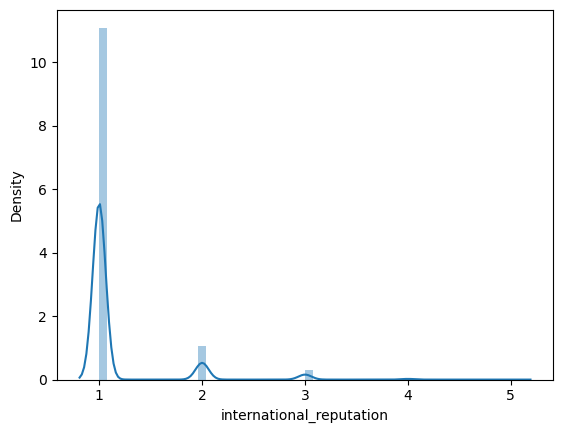

In [27]:
# see distributions
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

Distribution: 
<br> * age: a bit skewed to the left
<br> * overall_scores, best_overall, potential_scores, height, weight, total_stats: the distribution looks normal
<br> * growth: skewed to the left
<br> * value, wage, release_clause, goalkeeping, international_reputation: very skewed to the left
<br> * attacking, skill, mentality: more or less normal but have a bump in the left
<br> * power: a bit skewed to the right
<br> * defending: M form


In [28]:
# which are the golden players?

sorted_data_value = data.sort_values(by=["value"], ascending=False)
sorted_data_value_10 = sorted_data_value.head(10)
sorted_data_value_10

name  age  overall_scores  nationality                 club  \
id                                                                              
231747       K. Mbappé   21              90       France  Paris Saint-Germain   
190871       Neymar Jr   28              91       Brazil  Paris Saint-Germain   
192985    K. De Bruyne   29              91      Belgium      Manchester City   
188545  R. Lewandowski   31              91       Poland    FC Bayern München   
209331        M. Salah   28              90        Egypt            Liverpool   
208722         S. Mané   28              90      Senegal            Liverpool   
203376     V. van Dijk   28              90  Netherlands            Liverpool   
200389        J. Oblak   27              91     Slovenia      Atlético Madrid   
202652     R. Sterling   25              88      England      Manchester City   
211110       P. Dybala   26              88    Argentina             Juventus   

        best_overall better_position  potential_scores  height  weight   foot  \
id                                                                              
231747            91          Attack                95  177.80   73.03  Right   
190871            91          Attack                91  175.26   68.04  Right   
192985            91        Midfield                91  180.34   69.85  Right   
188545            91          Attack                91  182.88   79.83  Right   
209331            90          Attack                90  175.26   71.21   Left   
208722            90          Attack                90  175.26   68.95  Right   
203376            90         Defense                91  193.04   92.08  Right   
200389            91      Goalkeeper                93  187.96   87.09  Right   
202652            88          Attack                90  170.18   68.95  Right   
211110            89        Midfield                89  177.80   74.84   Left   

        growth      value    wage  release_clause  attacking  skill  movement  \
id                                                                              
231747       5  105500000  160000       203100000        408    394       458   
190871       0   90000000  270000       166500000        408    448       453   
192985       0   87000000  370000       161000000        407    441       398   
188545       0   80000000  240000       132000000        423    407       407   
209331       0   78000000  250000       144300000        392    406       460   
208722       0   78000000  250000       144300000        410    391       460   
203376       1   75500000  210000       145300000        316    363       354   
200389       2   75000000  125000       159400000         95    109       307   
202652       2   72500000  270000       139600000        360    387       464   
211110       1   71000000  190000       122500000        405    436       437   

        power  mentality  defending  goalkeeping  total_stats  \
id                                                              
231747    404        341        100           42         2147   
190871    357        356         94           59         2175   
192985    408        408        186           56         2304   
188545    420        391         96           51         2195   
209331    393        376        122           62         2211   
208722    406        358        122           56         2203   
203376    402        347        272           58         2112   
200389    268        140         57          437         1413   
202652    358        332        147           63         2111   
211110    382        348        120           26         2154   

       attacking_work_rate defensive_work_rate  international_reputation  
id                                                                        
231747                High                 Low                         3  
190871                High              Medium                         5  
192985            

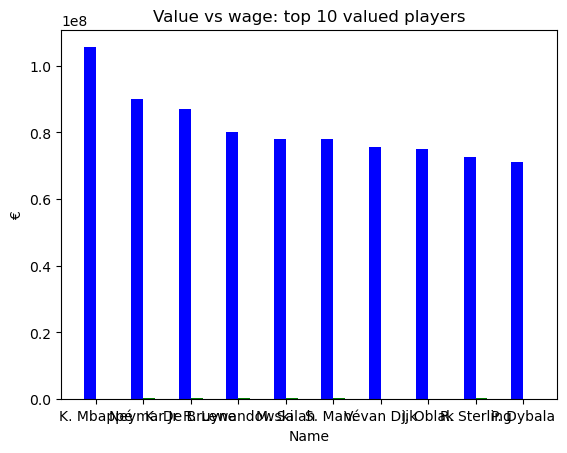

In [29]:
n=10
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, sorted_data_value_10["value"], color = 'b',
        width = width, #edgecolor = 'black',
        label='Value')
plt.bar(r + width, sorted_data_value_10["wage"], color = 'g',
        width = width, #edgecolor = 'black',
        label='Wage')
 
plt.xticks(r + width/2, sorted_data_value_10["name"])
    
    
plt.xlabel("Name")
plt.ylabel("€")
plt.title("Value vs wage: top 10 valued players")

plt.show()

In [30]:
px.bar(sorted_data_value_10, x="value", y ="name")

In [31]:
px.bar(sorted_data_value_10, x="wage", y ="name")

In [32]:
sorted_data_wage = data.sort_values(by=["wage"], ascending=False)
sorted_data_wage.head(10)

name  age  overall_scores nationality                 club  \
id                                                                           
158023      L. Messi   33              93   Argentina         FC Barcelona   
192985  K. De Bruyne   29              91     Belgium      Manchester City   
183277     E. Hazard   29              88     Belgium          Real Madrid   
165153    K. Benzema   32              89      France          Real Madrid   
182521      T. Kroos   30              88     Germany          Real Madrid   
200145      Casemiro   28              89      Brazil          Real Madrid   
155862  Sergio Ramos   34              89       Spain          Real Madrid   
153079     S. Agüero   32              89   Argentina      Manchester City   
194765  A. Griezmann   29              87      France         FC Barcelona   
190871     Neymar Jr   28              91      Brazil  Paris Saint-Germain   

        best_overall better_position  potential_scores  height  weight   foot  \
id                                                                              
158023            93          Attack                93  170.18   72.12   Left   
192985            91        Midfield                91  180.34   69.85  Right   
183277            88          Attack                88  175.26   73.94  Right   
165153            89          Attack                89  185.42   81.19  Right   
182521            88        Midfield                88  182.88   76.20  Right   
200145            89        Midfield                89  185.42   83.91  Right   
155862            89         Defense                89  182.88   82.10  Right   
153079            89          Attack                89  172.72   69.85  Right   
194765            87          Attack                87  175.26   73.03   Left   
190871            91          Attack                91  175.26   68.04  Right   

        growth     value    wage  release_clause  attacking  skill  movement  \
id                                                                             
158023       0  67500000  560000       138400000        429    470       451   
192985       0  87000000  370000       161000000        407    441       398   
183277       0  58000000  350000       118900000        388    427       448   
165153       0  53000000  350000       108700000        426    404       388   
182521       0  55000000  310000       112800000        397    432       332   
200145       0  59500000  310000       122000000        349    369       343   
155862       0  24500000  300000        50200000        374    381       378   
153079       0  53000000  300000        98100000        411    397       424   
194765       0  50500000  290000       103500000        425    429       425   
190871       0  90000000  270000       166500000        408    448       453   

        power  mentality  defending  goalkeeping  total_stats  \
id                                                              
158023    389        347         91           54         2231   
192985    408        408        186           56         2304   
183277    361        353         83           45         2105   
165153    400        363         89           41         2111   
182521    355        378        205           51         2150   
200145    437        396        259           67         2220   
155862    402        414        263           46         2258   
153079    403        341         83           59         2118   
194765    402        382        162           63         2288   
190871    357        356         94           59         2175   

       attacking_work_rate defensive_work_rate  international_reputation  
id                                                                        
158023              Medium                 Low                         5  
192985                High                High                         4  
183277                High              Medium                  

The players with higher value are not necessarily the ones with higher wages (that cost more money to the club).

In [33]:
# how do the different features relate with value? 

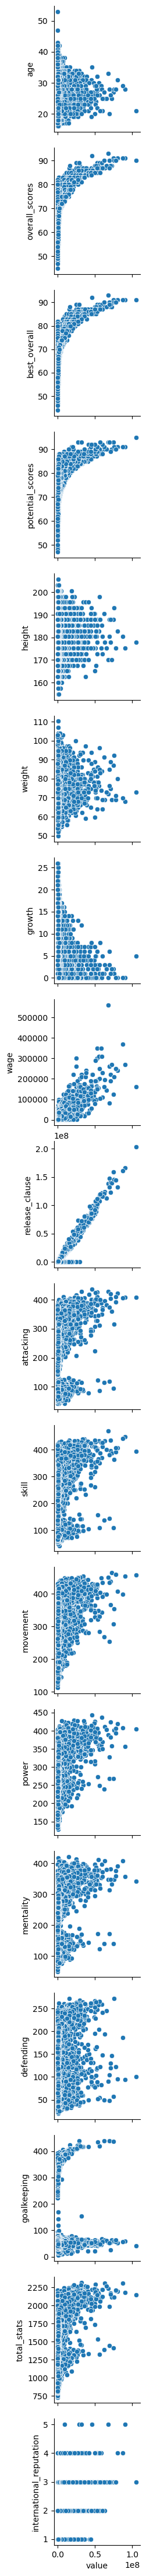

In [34]:
# numerical variables
sns.pairplot(data, x_vars=["value"], y_vars=['age', 'overall_scores', 'best_overall', 'potential_scores', 'height',
       'weight', 'growth', 'wage', 'release_clause', 'attacking',
       'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping',
       'total_stats', 'international_reputation'])

In [38]:
# nationality
data_nation_value = data[["nationality","value"]]

data_nation_value = data_nation_value.groupby("nationality").mean().sort_values(by=["value"], ascending = False)
data_nation_value = data_nation_value.head(10)

px.bar(data_nation_value)

In [39]:
# nationality and wages

data_nation_wage = data[["nationality","wage"]]

data_nation_wage = data_nation_wage.groupby("nationality").mean().sort_values(by=["wage"], ascending = False)
data_nation_wage = data_nation_wage.head(10)

px.bar(data_nation_wage)

In [ ]:
# which clubs have the highest valued players?

data_club_value = data[["club","value"]]

data_club_value = data_club_value.groupby("club").mean().sort_values(by=["value"], ascending = False)
data_club_value = data_club_value.head(10)

px.bar(data_club_value)

In [ ]:
# which clubs pay higher wages?

data_club_wage = data[["club","wage"]]

data_club_wage = data_club_wage.groupby("club").mean().sort_values(by=["wage"], ascending = False)
data_club_wage = data_club_wage.head(10)

px.bar(data_club_wage)

In [ ]:
# position
data_pos_value = data[["better_position","value"]]

data_pos_value = data_pos_value.groupby("better_position").mean().sort_values(by=["value"], ascending = False)

px.bar(data_pos_value)

In [ ]:
# which positions are best payed?

data_pos_wage = data[["better_position","wage"]]

data_pos_wage = data_pos_wage.groupby("better_position").mean().sort_values(by=["wage"], ascending = False)

px.bar(data_pos_wage)

In [ ]:
# foot
data_foot_value = data[["foot","value"]]

data_foot_value = data_foot_value.groupby("foot").mean().sort_values(by=["value"], ascending = False)

px.bar(data_foot_value)

## 4. Processing Data

In [ ]:
# check correlations
mask = np.zeros_like(numerical.corr())
#mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

The features most correlated with the target are "release_clause" (0.98) and "wage" (0.82)

In [ ]:
# drop correlated columns
data = data.drop(["best_overall","growth","attacking","skill","movement","power","mentality","defending","goalkeeping"], axis=1)
data.head()

In [ ]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [ ]:
data.describe()

In [ ]:
# X-y split
X = data.drop('value', axis=1)
y = data.value
X.shape

In [ ]:
# get numerical data
X_num = X._get_numeric_data()
X_num.shape

In [ ]:
# check normality
# sns.pairplot(X_num)

In [ ]:
X_num.describe().apply(lambda x: round(x,2))

In [ ]:
# Normalize (numerical)
X_scaled = StandardScaler().fit_transform(X_num)

def normalize(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_std[X_std==0] = 1.0
    X = (X-X_mean)/X_std
    return X

X_num = normalize(X_num)
X_num.head()

In [ ]:
# for column in X_num.columns:
#     sns.distplot(X_num[column])
#     plt.show()

In [ ]:
# Log transformation of variable "wage"
X_num_trans = X_num.copy()
def log_tranform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
       return x
    else:
        return np.NAN

X_num_trans['wage'] = list(map(log_tranform_clean, X_num_trans['wage']))
X_num_trans['wage'] = X_num_trans['wage'].fillna(np.mean(X_num_trans['wage']))
sns.distplot(X_num_trans['wage'])

In [ ]:
# get categorical data
X_cat = X.select_dtypes(np.object)
X_cat.head()

In [ ]:
# name --> drop for maschine learning
X_cat = X_cat.drop("name", axis= 1)

In [ ]:
# Nationality
X_cat.nationality.value_counts()

In [ ]:
top_countries = ["England", "Germany", "Spain", "France", "Brazil", "Argentina"]

def clean_nation(x):
    if x not in top_countries:
        x = "Other"
    else: x
    return x

X_cat["nationality"] = list(map(clean_nation, X_cat["nationality"])) 
X_cat["nationality"].value_counts()

In [ ]:
# Club
X_cat.club.value_counts()

In [ ]:
X_cat = X_cat.drop("club", axis= 1)

In [ ]:
# attacking_work_rate, defensive_work_rate
X_cat = X_cat.drop("attacking_work_rate", axis= 1)
X_cat = X_cat.drop("defensive_work_rate", axis= 1)

In [ ]:
X_cat.head()

In [ ]:
# apply get dummies to X_cat
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat.head()

In [ ]:
# Concat DataFrames 
X = pd.concat([X_num, X_cat], axis=1)
X.head()

### Saving the final dataset

In [ ]:
final_data = pd.concat([X, y], axis=1)

final_data.to_csv("final_data.csv")

## 5. Modeling

### Linear Regression

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# apply linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

In [ ]:
# predict on test data
y_pred_linreg

## 6. Model Validation

In [ ]:
r2 = r2_score(y_test, y_pred_linreg)
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred_linreg)
RMSE = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print("r2 =", r2)
print("Adjusted r2 =", adj_r2)
print("MSE =", MSE)
print("RMSE =", RMSE)
print("MAE =", MAE)

In [ ]:
# Try remove outliers

def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column], 75)
            lower = np.percentile(data[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            print(f"{column}: lower limit = {lower_limit}, upper limit = {upper_limit}")
            data = data[(data[column] > lower_limit) & (data[column] < upper_limit)]
    return data

data1 = data.copy()
data1 = remove_outliers(data1, threshold=1.5, skip_columns=['international_reputation','value'])
data1.head()

In [ ]:
X = data1.drop('value', axis=1)
y = data1.value

X_num = X._get_numeric_data()

X_scaled = StandardScaler().fit_transform(X_num)
def normalize(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_std[X_std==0] = 1.0
    X = (X-X_mean)/X_std
    return X
X_num = normalize(X_num)

X_cat = X.select_dtypes(np.object)
X_cat = X_cat.drop("name", axis= 1)

top_countries = ["England", "Germany", "Spain", "France", "Brazil", "Argentina"]
def clean_nation(x):
    if x not in top_countries:
        x = "Other"
    else: x
    return x
X_cat["nationality"] = list(map(clean_nation, X_cat["nationality"])) 

X_cat = X_cat.drop("club", axis= 1)

defense_positions = ["CB", "RB", "LB", "LWB", "RWB"]
midfield_positions = ["CDM", "CM", "RM", "LM", "CAM"]
attack_positions = ["LW", "RW", "CF", "ST"]
def clean_position(x):
    if x in defense_positions:
        x = "Defense"
    elif x in midfield_positions:
        x = "Midfield"
    elif x in attack_positions:
        x = "Attack"
    elif x == "GK":
        x = "Goalkeeper"
    return x
X_cat["better_position"] = list(map(clean_position, X_cat["better_position"])) 

X_cat = X_cat.drop("attacking_work_rate", axis= 1)
X_cat = X_cat.drop("defensive_work_rate", axis= 1)

X_cat = pd.get_dummies(X_cat, drop_first=True)

X = pd.concat([X_num, X_cat], axis=1)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

y_pred_linreg

r2 = r2_score(y_test, y_pred_linreg)
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred_linreg)
RMSE = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print("r2 =", r2)
print("Adjusted r2 =", adj_r2)
print("MSE =", MSE)
print("RMSE =", RMSE)
print("MAE =", MAE)

In [ ]:
data1.describe()

## 7. Reporting